# Language detection showdown

In [114]:
import pandas as pd

df_lingua = pd.read_csv('./lingua-poc/detected.csv')
df_langdetect = pd.read_csv('./langdetect-poc/detected.csv')
df_fasttext = pd.read_csv('./fasttext-poc/detected.csv')

def F(x): 
    return "{:.3f}".format(x)



## Dataset 

In [74]:
df_lang = df_lingua.groupby(['truth']).count()
df_lang.drop(columns=['detected'])

,match
truth,
ar,536
da,428
de,470
el,365
en,1385
es,819
fr,1014
hi,63
it,698


## Lingua

- Link: https://github.com/pemistahl/lingua
- Language: Java

In [4]:
df1 = df_lingua.groupby(['truth', 'match']).agg('count')
df1['perc'] = df1['detected'] / df_lang['detected'] * 100
df_lingua_agg = df1.reset_index().query('match == "Y"').set_index('truth')
df_lingua_agg



,match,detected,perc
truth,,,
ar,Y,534,99.626866
da,Y,417,97.429907
de,Y,469,99.787234
el,Y,364,99.726027
en,Y,1375,99.277978
es,Y,794,96.947497
fr,Y,1005,99.112426
hi,Y,63,100.000000
it,Y,684,97.994269


In [117]:
df_l1 = df_lingua.query('truth != "kn" and truth != "ml"')
TP = len(df_l1.query('match == "Y"'))
FP = len(df_l1.query('match == "N"'))
FN = len(df_l1.query('detected == "none"'))
TOT = len(df_l1)

print("TP:", TP, "FP:", FP, "FN:", FN, "TOT:", TOT)
print("Accuracy:", F(TP / TOT), "Precision:", F(TP / (TP + FP)), "Recall:", F(TP / (TP + FN)))


TP: 9269 FP: 105 FN: 5 TOT: 9374
Accuracy: 0.989 Precision: 0.989 Recall: 0.999


## Langdetect

- Link: https://pypi.org/project/langdetect/
- Language: Python

In [118]:
df_langdetect['detected'].fillna('none', inplace = True)

df3 = df_langdetect.groupby(['truth', 'match']).agg('count')
df3['perc'] = df3['detected'] / df_lang['detected'] * 100
df_langdetect_agg = df3.reset_index().query('match == "Y"').set_index('truth')

df_langdetect_agg


,match,detected,perc
truth,,,
ar,Y,533,99.440299
da,Y,362,84.579439
de,Y,448,95.319149
el,Y,365,100.000000
en,Y,1331,96.101083
es,Y,758,92.551893
fr,Y,982,96.844181
hi,Y,62,98.412698
it,Y,668,95.702006


In [119]:
TP = len(df_langdetect.query('match == "Y"'))
FP = len(df_langdetect.query('match == "N"'))
FN = len(df_langdetect.query('detected == "none"'))
TOT = len(df_fasttext)

print("TP:", TP, "FP:", FP, "FN:", FN, "TOT:", len(df_fasttext))

print("Accuracy:", F(TP / TOT), "Precision:", F(TP / (TP + FP)), "Recall:", F(TP / (TP + FN)))

TP: 9874 FP: 463 FN: 5 TOT: 10337
Accuracy: 0.955 Precision: 0.955 Recall: 0.999


## Fasttext 

- Link: https://fasttext.cc/ + https://github.com/vunb/node-fasttext 
- Language: JS

In [44]:
df3 = df_fasttext.groupby(['truth', 'match']).agg('count')
del df3['precision']

df3['perc'] = df3['detected'] / df_lang['detected'] * 100
df_fasttext_agg = df3.reset_index().query('match == "Y"').set_index('truth')

df_fasttext_agg

,match,detected,perc
truth,,,
ar,Y,532,99.253731
da,Y,386,90.186916
de,Y,465,98.936170
el,Y,365,100.000000
en,Y,1381,99.711191
es,Y,809,98.778999
fr,Y,1009,99.506903
hi,Y,63,100.000000
it,Y,689,98.710602


In [115]:
TP = len(df_fasttext.query('match == "Y"'))
FP = len(df_fasttext.query('match == "N"'))
FN = len(df_fasttext.query('detected == "none"'))
TOT = len(df_fasttext)

print("TP:", TP, "FP:", FP, "FN:", FN, "TOT:", len(df_fasttext))

print("Accuracy:", F(TP / TOT), "Precision:", F(TP / (TP + FP)), "Recall:", F(TP / (TP + FN)))

TP: 10202 FP: 135 FN: 0 TOT: 10337
Accuracy: 0.987 Precision: 0.987 Recall: 1.000


## Accuracy comparison

<Axes: xlabel='truth'>

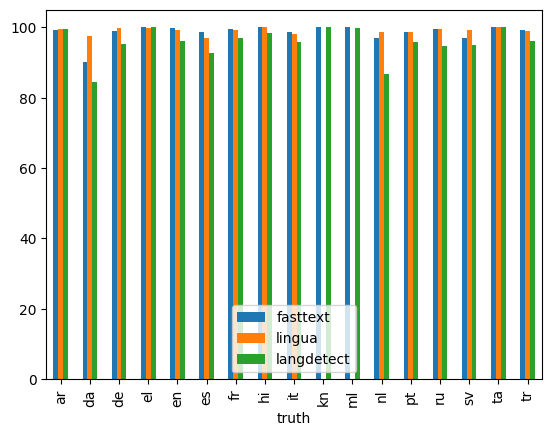

In [73]:

df_all = df_lang.copy()
df_all['lingua'] = df_lingua_agg['perc']
df_all['fasttext'] = df_fasttext_agg['perc']
df_all['langdetect'] = df_langdetect_agg['perc']

df_all.plot.bar(y=['fasttext', 'lingua', 'langdetect'])

